In [3]:
# advance neuro project

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [6]:
def ReLU(x):
    zeros_mat = np.zeros(x.shape)
    output = np.fmax(x,zeros_mat)
    return output

In [5]:
def ReLU_deriv(x):
    non_negs = np.where(x >= 0)
    output = np.zeros(x.shape)
    output[non_negs] = 1
    return output

In [3]:
def angleCal(A, B):
    num = np.trace(np.matmul(np.conjugate(A.T), B))
    norm_A = math.sqrt(np.trace(np.matmul(A,np.conjugate(A.T))))
    norm_B = math.sqrt(np.trace(np.matmul(B,np.conjugate(B.T))))
    denum = norm_A*norm_B
    angle = np.arccos(num/denum)*180/math.pi
    return angle

In [38]:
#### network parameters - open loop 2 layer network - first condition - auto correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) # initial value of error_delta 2 - constant during iterations
error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since
# delta 2 doesn't change

# updating the network parameters
rep = 10
angles1 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))
    
    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
    error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) # initial value of error_delta 2 - constant during iterations
    error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since

    
    for j in range (number_of_iterations):
        angles1[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(input_layer, forward_weight_0)
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


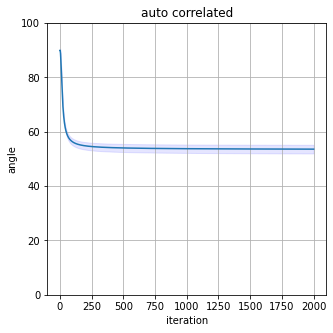

In [39]:
## plot the result of auto correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5));
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0));
ax.set_ylim([0, 100]);
ax.set_title('auto correlated');
ax.set_ylabel('angle');
ax.set_xlabel('iteration');
ax.grid(True);

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);


In [42]:
#### network parameters - open loop 2 layer network - second condition - cross correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta2 = input_layer # cross correlated with inputs of network
error_delta1 = np.matmul(error_delta2, backward_weight_1) 

# updating the network parameters
rep = 10
angles2 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
    error_delta2 = input_layer # cross correlated with inputs of network
    error_delta1 = np.matmul(error_delta2, backward_weight_1) 
    
    for j in range (number_of_iterations):
        angles2[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(input_layer, forward_weight_0)
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = input_layer
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


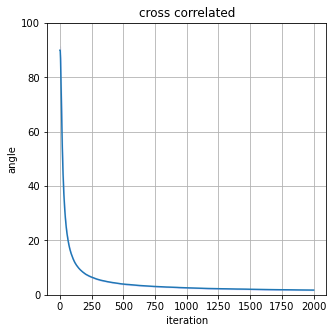

In [43]:
# plot the result of cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0))
ax.set_ylim([0, 100])
ax.set_title('cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='b', alpha=.1);


In [44]:
#### network parameters - open loop 2 layer network - third condition - not auto correlated nor cross correlated

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta2 = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta1 = np.matmul(error_delta2, backward_weight_1)

# updating the network parameters
rep = 10
angles3 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
    error_delta2 = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
    error_delta1 = np.matmul(error_delta2, backward_weight_1)

    for j in range (number_of_iterations):
        angles3[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) 
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


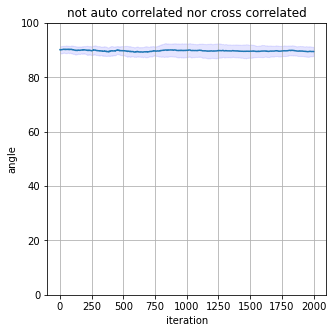

In [45]:
# plot the result of not auto correlated nor cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0))
ax.set_ylim([0, 100])
ax.set_title('not auto correlated nor cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='b', alpha=.1);


In [46]:
#### network parameters - open loop 2 layer network - forth condition - auto correlated & cross correlated

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
error_delta2 = input_layer # initial value of error_delta 2 - constant during iterations
error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since
# delta 2 doesn't change

# updating the network parameters
rep = 10
angles4 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
    error_delta2 = input_layer # initial value of error_delta 2 - constant during iterations
    error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since
    # delta 2 doesn't change

    for j in range (number_of_iterations):
        angles4[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(input_layer, forward_weight_0)
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


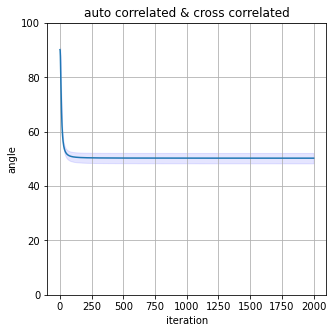

In [47]:
# plot the result of auto correlated & cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles4,0))
ax.set_ylim([0, 100])
ax.set_title('auto correlated & cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles4,0)-np.std(angles4,axis=0), np.mean(angles4,0)+np.std(angles4,axis=0),\
                color='b', alpha=.1);


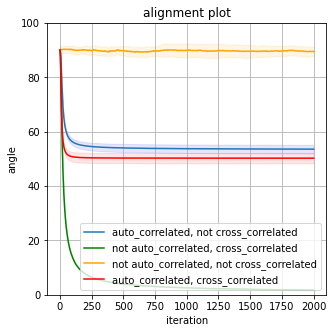

In [48]:
# plot the result of all three conditions together

    
fig, ax = plt.subplots(1,1,figsize=(5,5))

# condition 1
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0))
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence1 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);

# condition 2
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0),color='green')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence2 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='green', alpha=.1);

# condition 3
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0),color='orange')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence3 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='orange', alpha=.1);

# condition 4
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles4,0),color='red')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence4 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles4,0)-np.std(angles4,axis=0), np.mean(angles4,0)+np.std(angles4,axis=0),\
                color='red', alpha=.1);

ax.legend(['auto_correlated, not cross_correlated','not auto_correlated, cross_correlated',\
           'not auto_correlated, not cross_correlated',\
          'auto_correlated, cross_correlated'],loc='lower right')

In [2]:
# Paper Part - 2.3 Using the provided theoretical tool to investigate FA in the learning process of a practical deep ANN
# train and test a 5 layer network on MNIST
# fact = tanh(ReLU) - 50 neurons in all hidden and output layer - output layer is using 5 hot coding
# images of MNIST should be resized to 15*15 - so we have 225 neurons in input layer 
# inputs should be normalized 
# batch size = 1000, 60 batches available (total numbre of 60K images)
# initialization of forward/ backward weights and biases is done using N(0,0.1)
# loss function is sth like squared error, check page 5 for the details

In [1]:
def n_hot_coder(x,n,hot_labels,output_neuron_num):
    category_num = 10
    if(category_num*n > output_neuron_num):
        print('nhot encoding can`t be done since the condition`s not met')
        return false
    
    output = np.zeros((len(x),output_neuron_num))
    
    output[np.where(x == 0),:] = hot_labels[0,:]
    output[np.where(x == 1),:] = hot_labels[1,:]
    output[np.where(x == 2),:] = hot_labels[2,:]
    output[np.where(x == 3),:] = hot_labels[3,:]
    output[np.where(x == 4),:] = hot_labels[4,:]
    output[np.where(x == 5),:] = hot_labels[5,:]
    output[np.where(x == 6),:] = hot_labels[6,:]
    output[np.where(x == 7),:] = hot_labels[7,:]
    output[np.where(x == 8),:] = hot_labels[8,:]
    output[np.where(x == 9),:] = hot_labels[9,:]

    return output

In [2]:
def loss_function(output_layer,labels):
    difference = labels-output_layer
    output = 0.5*(np.sum(difference**2))
    return output

In [3]:
def tanh_Relu_deriv(x):
    non_negs = np.where(x > 0)
    output = np.zeros(x.shape)
    output[non_negs] = 1-np.tanh(x[non_negs])**2
    return output

In [4]:
def binarize_output(output,n):
    binarized = np.zeros(output.shape)
    n = n # n max values
    for i in range(len(output)):
        sorted_indices = np.argsort(output[i,:])
        binarized[i,sorted_indices[-n:]] = 1
    return binarized

In [5]:
def accuracy_cal(output,label):
    acc = 0
    for i in range(len(output)):
        if(sum(output[i,:] == label[i,:]) == output.shape[1]):
            acc += 1
  
    acc = acc/len(output)*100 # in percentage
    return acc

In [6]:
def alignment_term_cal(iterations_num,batch_num,layer_num,LR,B1,B2,B3,B4,delta5_inTime,delta4_inTime,delta3_inTime,\
                      delta2_inTime,delta1_inTime,input_layer,hidden_layer1_inTime,hidden_layer2_inTime,\
                      hidden_layer3_inTime,hidden_layer4_inTime):
    
    alignment_terms = np.zeros((iterations_num,batch_num,layer_num,output_layer_size,output_layer_size))

    
    # cal alignment terms
    for i in range(1,iterations_num*batch_num):
        print(i)
        o = 1
        while (o <= i):
            # l1
            term1 = np.matmul(B1.T,delta2_inTime[i-o,:,:].T)
            term2 = np.matmul(input_layer[batch_num-np.mod(o,batch_num)-1,:,:],input_layer[batch_num-1,:,:].T)
            term3 = delta2_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms[int(i/batch_num),np.mod(i,batch_num),0,:,:] = (LR**2)*np.matmul(term4,term3)
            # l2
            term1 = np.matmul(B2.T,delta3_inTime[i-o,:,:].T)
            term2 = np.matmul(hidden_layer1_inTime[i,:,:],hidden_layer1_inTime[i,:,:].T)
            term3 = delta3_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms[int(i/batch_num),np.mod(i,batch_num),1,:,:] = (LR**2)*np.matmul(term4,term3)
            # l3
            term1 = np.matmul(B3.T,delta4_inTime[i-o,:,:].T)
            term2 = np.matmul(hidden_layer2_inTime[i,:,:],hidden_layer2_inTime[i,:,:].T)
            term3 = delta4_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms[int(i/batch_num),np.mod(i,batch_num),2,:,:] = (LR**2)*np.matmul(term4,term3)
            # l4
            term1 = np.matmul(B4.T,delta5_inTime[i-o,:,:].T)
            term2 = np.matmul(hidden_layer3_inTime[i,:,:],hidden_layer3_inTime[i,:,:].T)
            term3 = delta4_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms[int(i/batch_num),np.mod(i,batch_num),3,:,:] = (LR**2)*np.matmul(term4,term3)
            
            o += 1
    
    return alignment_terms

In [7]:
# Load MNIST Dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('data loaded!')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


data loaded!
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [10]:
# resize images to 15*15
import cv2

x_train_resized = np.zeros((x_train.shape[0],15,15))
x_test_resized = np.zeros((x_test.shape[0],15,15))

# resize train images
for i in range (x_train.shape[0]):
    image = np.squeeze(x_train[i,:,:])
    x_train_resized[i,:,:] = cv2.resize(image,(15,15))

    
# resize test images
for i in range (x_test.shape[0]):
    image = np.squeeze(x_test[i,:,:])
    x_test_resized[i,:,:] = cv2.resize(image,(15,15))
    
print('resizing done!')
print(x_train_resized.shape,x_test_resized.shape)


resizing done!
(60000, 15, 15) (10000, 15, 15)


In [11]:
# vectorize images

x_train_flat = x_train_resized.reshape(x_train_resized.shape[0],-1)
x_test_flat = x_test_resized.reshape(x_test_resized.shape[0],-1)
print('vectorization done!')
print(x_train_flat.shape,x_test_flat.shape)

vectorization done!
(60000, 225) (10000, 225)


In [12]:
# normalize images

x_tr_norm = x_train_flat/255
x_te_norm  = x_test_flat/255

print('normalization done!')

normalization done!


In [13]:
# n hot coding the labels
category_num = 10
output_neuron_num = 10
n = int(output_neuron_num/category_num)

# encoding the categroies
categories_nhot = np.zeros((category_num,output_neuron_num))
codes = random.sample(range(output_neuron_num), output_neuron_num)
for i in range(category_num):
    categories_nhot[i,codes[i*n:(i+1)*n]] = 1 
    
y_train_nhot = n_hot_coder(y_train,n,categories_nhot,output_neuron_num)
y_test_nhot = n_hot_coder(y_test,n,categories_nhot,output_neuron_num)

    
print('n hot coding done!')
print(y_train_nhot.shape, y_test_nhot.shape)

n hot coding done!
(60000, 10) (10000, 10)


In [14]:
# create the network weights and biases from N(0,0.1)
mu = 0
sigma = 0.1

# each layer size
input_layer_size = 225
hidden_layer1_size = 50
hidden_layer2_size = 50
hidden_layer3_size = 50
hidden_layer4_size = 50
output_layer_size = 10

# forward weights
w0 = np.random.normal(mu,sigma,size=(input_layer_size,hidden_layer1_size))
w1 = np.random.normal(mu,sigma,size=(hidden_layer1_size,hidden_layer2_size))
w2 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer3_size))
w3 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer4_size))
w4 = np.random.normal(mu,sigma,size=(hidden_layer4_size,output_layer_size))

# backward weights
B4 = np.random.normal(mu,sigma,size=(output_layer_size,hidden_layer4_size))
B3 = np.random.normal(mu,sigma,size=(hidden_layer4_size,hidden_layer3_size))
B2 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer2_size))
B1 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer1_size))

# bias vectors
b1 =  np.random.normal(mu,sigma,hidden_layer1_size)
b2 =  np.random.normal(mu,sigma,hidden_layer2_size)
b3 =  np.random.normal(mu,sigma,hidden_layer3_size)
b4 =  np.random.normal(mu,sigma,hidden_layer4_size)
b5 =  np.random.normal(mu,sigma,output_layer_size)

print('network parameters created!')

network parameters created!


In [19]:
import pandas as pd

# run the network - run prev part to initialize the paramters each time

LR = 0.001
batch_size = 1000
batch_num = 60
layer_num = 4
im_size = 15*15
input_layer = x_tr_norm.reshape((batch_num,batch_size,im_size))
iterations_num = 20
accuracy_training = np.zeros((batch_num,iterations_num))
loss_training = np.zeros((batch_num,iterations_num))

# angle between B & W
alignment = np.zeros((4,batch_num,iterations_num))


# layer and delta values in iterations for calculating alignment terms
hidden_layer1_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer1_size))
hidden_layer2_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer2_size))
hidden_layer3_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer3_size))
hidden_layer4_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer4_size))
output_layer_inTime = np.zeros((iterations_num*batch_num,batch_size,output_layer_size))
delta5_inTime = np.zeros((iterations_num*batch_num,batch_size,output_layer_size))
delta4_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer4_size))
delta3_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer3_size))
delta2_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer2_size))
delta1_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer1_size))




for j in range(iterations_num):
    for i in range(batch_num):
        # forward
        z1 = np.matmul(input_layer[i,:,:],w0) + b1
        hidden_layer1 = np.tanh(ReLU(z1))
        hidden_layer1_inTime[j*batch_num+i,:,:] = hidden_layer1
        z2 = np.matmul(hidden_layer1,w1) + b2
        hidden_layer2 = np.tanh(ReLU(z2))
        hidden_layer2_inTime[j*batch_num+i,:,:] = hidden_layer2
        z3 = np.matmul(hidden_layer2,w2) + b3
        hidden_layer3 = np.tanh(ReLU(z3))
        hidden_layer3_inTime[j*batch_num+i,:,:] = hidden_layer3
        z4 = np.matmul(hidden_layer3,w3) + b4
        hidden_layer4 = np.tanh(ReLU(z4))
        hidden_layer4_inTime[j*batch_num+i,:,:] = hidden_layer4
        z5 = np.matmul(hidden_layer4,w4) + b5
        output_layer = np.tanh(ReLU(z5))
        output_layer_inTime[j*batch_num+i,:,:] = output_layer
        
        # backward the error
        E = y_train_nhot[i*batch_size:(i+1)*batch_size,:]-output_layer
        delta5 = np.multiply(E,tanh_Relu_deriv(z5))
        delta5_inTime[j*batch_num+i,:,:] = delta5
        delta4 = np.multiply(np.matmul(delta5,B4),tanh_Relu_deriv(z4))
        delta4_inTime[j*batch_num+i,:,:] = delta4
        delta3 = np.multiply(np.matmul(delta4,B3),tanh_Relu_deriv(z3))
        delta3_inTime[j*batch_num+i,:,:] = delta3
        delta2 = np.multiply(np.matmul(delta3,B2),tanh_Relu_deriv(z2))
        delta2_inTime[j*batch_num+i,:,:] = delta2
        delta1 = np.multiply(np.matmul(delta2,B1),tanh_Relu_deriv(z1))
        delta1_inTime[j*batch_num+i,:,:] = delta1
        
        # update forward weights 
        w4 += LR*np.matmul(hidden_layer4.T,delta5)
        w3 += LR*np.matmul(hidden_layer3.T,delta4)
        w2 += LR*np.matmul(hidden_layer2.T,delta3)
        w1 += LR*np.matmul(hidden_layer1.T,delta2)
        w0 += LR*np.matmul(input_layer[i,:,:].T,delta1)
        
        # update biases
        J = np.ones((1,batch_size))
        b5 += np.squeeze(LR*np.matmul(J,delta5))
        b4 += np.squeeze(LR*np.matmul(J,delta4))
        b3 += np.squeeze(LR*np.matmul(J,delta3))
        b2 += np.squeeze(LR*np.matmul(J,delta2))
        b1 += np.squeeze(LR*np.matmul(J,delta1))
        
        # binarize output
        n = 1
        output_layer_binarized = binarize_output(output_layer,n)

        # loss values
        loss_training[i,j] = loss_function(output_layer,y_train_nhot[i*batch_size:(i+1)*batch_size,:])
        accuracy_training[i,j] = accuracy_cal(output_layer_binarized,y_train_nhot[i*batch_size:(i+1)*batch_size,:]);
        
        # cal the angle between B & W
        alignment[0,i,j] = angleCal(w1,B1.T)
        alignment[1,i,j] = angleCal(w2,B2.T) 
        alignment[2,i,j] = angleCal(w3,B3.T) 
        alignment[3,i,j] = angleCal(w4,B4.T) 
    
    print(np.mean(accuracy_training[:,j]),np.mean(loss_training[:,j]))

print('network training done!')

18.119999999999997 465.0009497223606
33.660000000000004 420.2718961567328
44.91499999999999 372.063291746825
54.823333333333345 323.37167999852494
59.384999999999984 289.2587407210227
61.63166666666667 269.3840110394845
64.90333333333334 250.71911554516237
67.36 236.40716456479774
69.28999999999999 224.56608833718977
70.69000000000001 216.36234455323256
71.84833333333331 210.32081401251702
72.66666666666667 205.50863988665216
74.045 193.54609589220172
75.53 184.77850315942652
76.50500000000001 177.77000156009373
77.605 170.5985308742635
78.81166666666668 164.39683540189446
79.82333333333332 159.60876658955343
80.72499999999998 155.8236976323203
81.47833333333332 152.73837133169175
network training done!


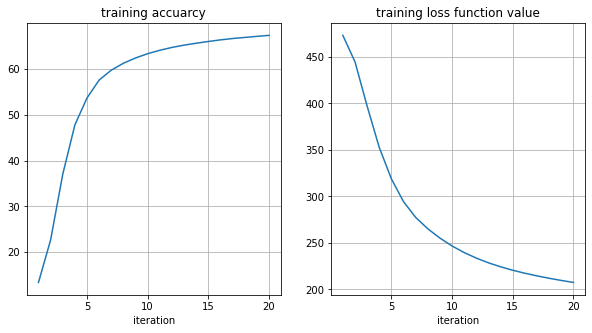

In [58]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(1,iterations_num+1),np.mean(accuracy_training,axis=0))
ax[1].plot(np.arange(1,iterations_num+1),np.mean(loss_training,axis=0))
ax[0].set_title('training accuarcy')
ax[0].set_xlabel('iteration')
ax[1].set_title('training loss function value')
ax[1].set_xlabel('iteration')
ax[0].grid(True)
ax[1].grid(True)

In [60]:
import pandas as pd

# accuracy on test data

batch_size = 1
batch_num = int(x_te_norm.shape[0]/batch_size)
im_size = 15*15
input_layer = x_te_norm.reshape((batch_num,batch_size,im_size))
accuracy_training = np.zeros((batch_num))
loss_training = np.zeros((batch_num))

for i in range(batch_num):
    # forward
    z1 = np.matmul(input_layer[i,:,:],w0) + b1
    hidden_layer1 = np.tanh(ReLU(z1))
    z2 = np.matmul(hidden_layer1,w1) + b2
    hidden_layer2 = np.tanh(ReLU(z2))
    z3 = np.matmul(hidden_layer2,w2) + b3
    hidden_layer3 = np.tanh(ReLU(z3))
    z4 = np.matmul(hidden_layer3,w3) + b4
    hidden_layer4 = np.tanh(ReLU(z4))
    z5 = np.matmul(hidden_layer4,w4) + b5
    output_layer = np.tanh(ReLU(z5))

    # binarize output
    n = 1
    output_layer_binarized = binarize_output(output_layer,n)
    
    # loss val and accuracy
    loss_training[i] = loss_function(output_layer_binarized,y_test_nhot[i*batch_size:(i+1)*batch_size,:])
    accuracy_training[i] = accuracy_cal(output_layer_binarized,y_test_nhot[i*batch_size:(i+1)*batch_size,:]);

print('accuracy: ',np.mean(accuracy_training),' | loss value: ', np.mean(loss_training))
print('done!')

accuracy:  67.94  | loss value:  0.3206
done!


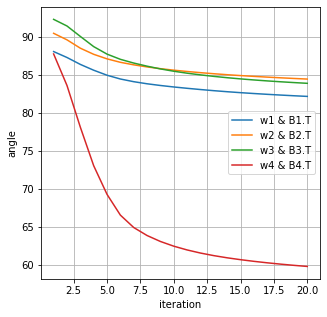

In [61]:
# angle between backward weights and forward weights
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[0,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[1,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[2,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[3,:,:],axis=0))


ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.legend(['w1 & B1.T','w2 & B2.T','w3 & B3.T','w4 & B4.T'],loc='best')
ax.grid(True)

In [35]:
# # alignment terms calculation
# LR = 0.0008
# batch_size = 1000
# batch_num = 60
# layer_num = 4
# im_size = 15*15
# iterations_num = 20
# input_layer = x_tr_norm.reshape((batch_num,batch_size,im_size))
# a = alignment_term_cal(iterations_num,batch_num,layer_num,LR,B1,B2,B3,B4,delta5_inTime,delta4_inTime,delta3_inTime,\
#                       delta2_inTime,delta1_inTime,input_layer,hidden_layer1_inTime,hidden_layer2_inTime,\
#                       hidden_layer3_inTime,hidden_layer4_inTime)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [38]:
# # cal angles between alignment terms and backwart weights.T
# angles_alignment_terms = np.zeros((a.shape[0:3]))
# for i in range(angles_alignment_terms.shape[0]):
#     for j in range(angles_alignment_terms.shape[0]):
#         angles_alignment_terms[i,j,0] = angleCal(a[i,j,0,:,:],B1.T)
#         angles_alignment_terms[i,j,1] = angleCal(a[i,j,1,:,:],B2.T)
#         angles_alignment_terms[i,j,2] = angleCal(a[i,j,2,:,:],B3.T)
#         angles_alignment_terms[i,j,3] = angleCal(a[i,j,3,:,:],B4.T)
    

<ipython-input-4-7bcd244f190b>:6: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(num/denum)*180/math.pi


(20, 60, 4)


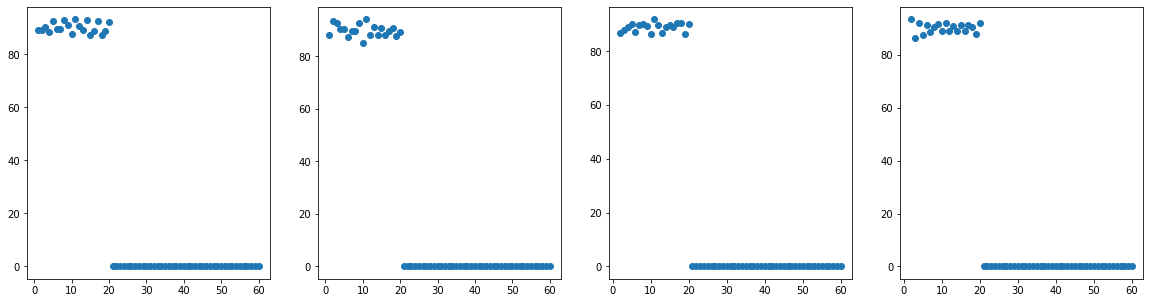

In [65]:
print(angles_alignment_terms.shape)
fig, ax = plt.subplots(1,4,figsize=(20,5))

ax[0].scatter(np.arange(1,61),angles_alignment_terms[19,:,0])
ax[1].scatter(np.arange(1,61),angles_alignment_terms[15,:,1])
ax[2].scatter(np.arange(1,61),angles_alignment_terms[0,:,2])
ax[3].scatter(np.arange(1,61),angles_alignment_terms[0,:,3])